# My try on this is...
to try the simple PolinomialFeatures and try to represent in the 3D space...

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [33]:
X, y = make_circles(noise= 0.1, factor= .21)

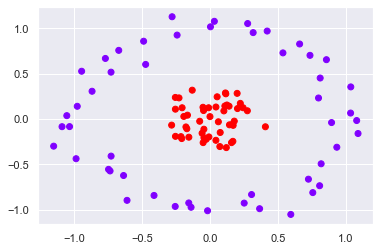

In [34]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')

In [51]:
X_3d = PolynomialFeatures(degree= 1)

In [52]:
X_3d = X_3d.fit_transform(X)

In [53]:
X_3d.shape

(100, 3)

In [60]:
%matplotlib inline

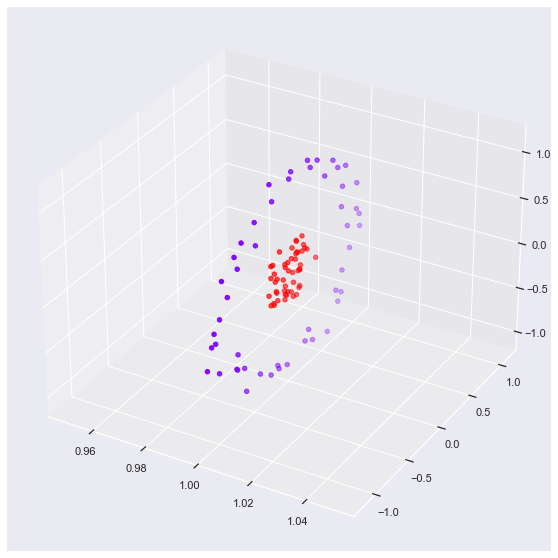

In [97]:
plt.figure(figsize= (10,10))
axes = plt.axes(projection= '3d')
axes.scatter3D(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c= y, cmap= 'rainbow')

Whoops, it didn't work... that's why there are other tricks called as `rbf` and `poly` ... which I encourage you to check out by watching the statquest videos.

# 

# Modeling the 'rbf'

In [63]:
#We have
X[:10]

array([[ 0.16869544, -0.24731826],
       [ 1.03694699,  0.35273929],
       [-0.97724749,  0.13892248],
       [-0.13918395, -0.97434638],
       [ 0.10971475,  0.14216831],
       [ 0.04371853, -0.23607924],
       [ 0.25195993, -0.92841983],
       [ 0.11390119,  0.28616379],
       [-0.05803764, -0.1581872 ],
       [-0.01769662, -1.01256282]])

In [64]:
#we have
y[: 10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [67]:
r = np.exp( - (X ** 2).sum(axis= 1))
r.shape

(100,)

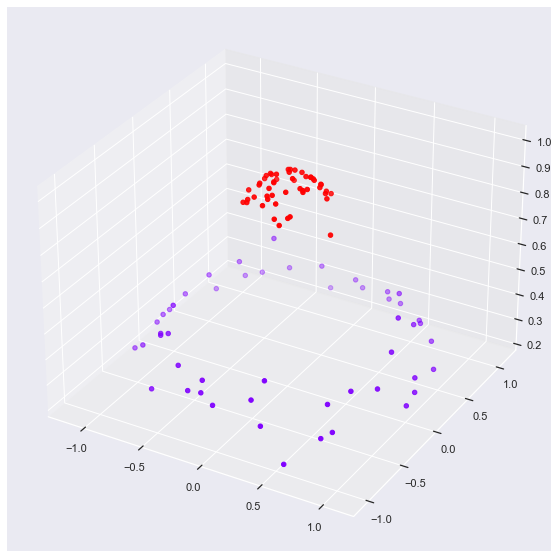

In [77]:
plt.figure(figsize= (10,10))
axes = plt.axes(projection= '3d')
axes.scatter3D(X[:, 0], X[:, 1], r, c= y, cmap= 'rainbow')

## Cool! Now it is working... 

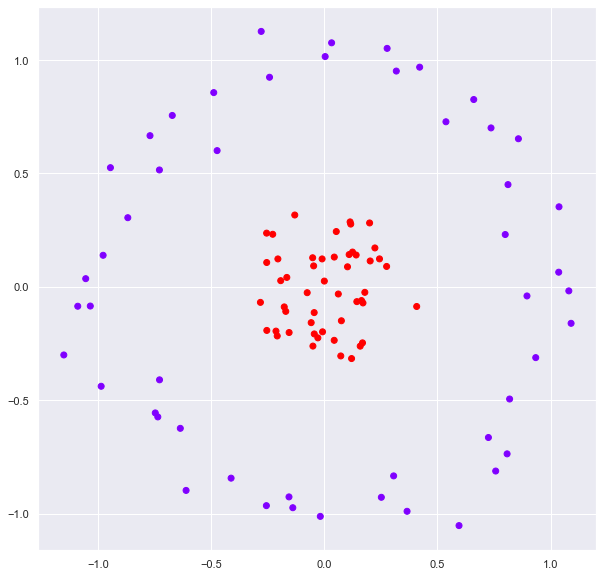

In [99]:
# to draw the line -- 
plt.figure(figsize= (10,10))
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')
#in this

## Need to train the model first... and remember, the `linear` plane will not help us here as the relationship is not linear...

In [100]:
model = SVC(kernel= 'rbf', C= 1E6)

In [101]:
model.fit(X, y)

SVC(C=1000000.0)

#### That, meshgrid...

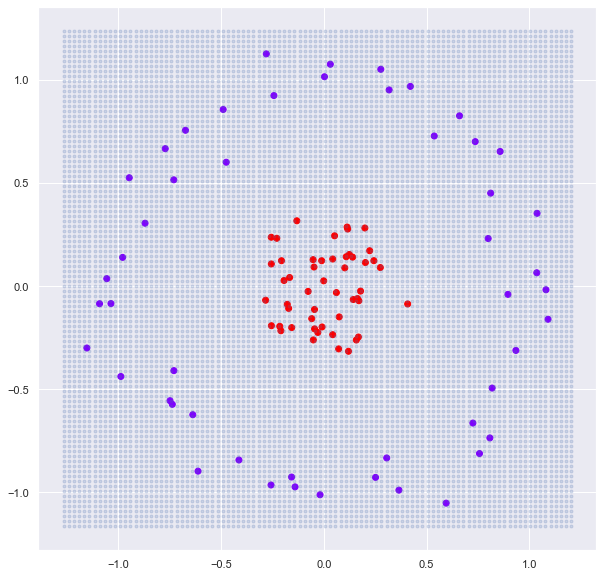

In [112]:
plt.figure(figsize= (10,10))
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)

xx, yy = np.meshgrid(xx, yy)

plt.scatter(xx, yy, marker= '.', alpha= 0.2)

In [116]:
temp = np.vstack([xx.ravel(), yy.ravel()]).T

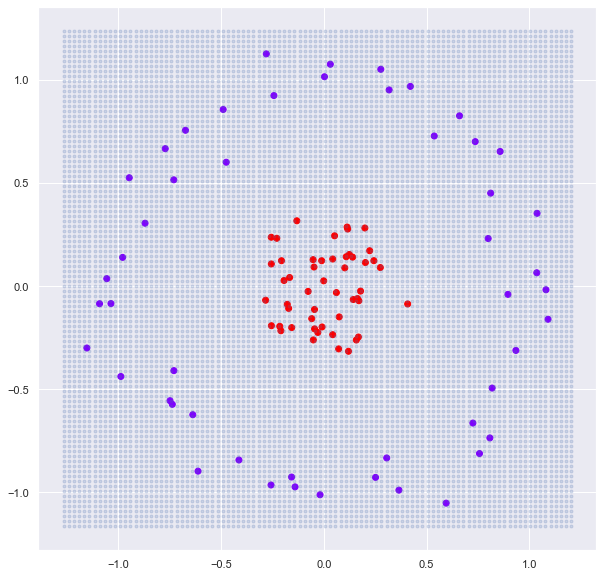

In [120]:
plt.figure(figsize= (10,10))
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)

xx, yy = np.meshgrid(xx, yy)
xy = np.vstack([xx.ravel(), yy.ravel()]).T   
plt.scatter(xy[:,0], xy[:,1], marker= '.', alpha= 0.2)  #Same thing as passwing xx, yy in scatter but now temp[:,0], temp[:,1]

In [125]:
SVs = model.support_vectors_
SVs

array([[ 0.5373597 ,  0.72777637],
       [-0.72802795, -0.41036071],
       [ 0.81866677, -0.49499467],
       [-0.473618  ,  0.6005742 ],
       [ 0.79932519,  0.23048297],
       [ 0.30629037, -0.8340319 ],
       [-0.2549333 ,  0.23662906],
       [ 0.40811923, -0.08691783],
       [-0.25408931, -0.19248222]])

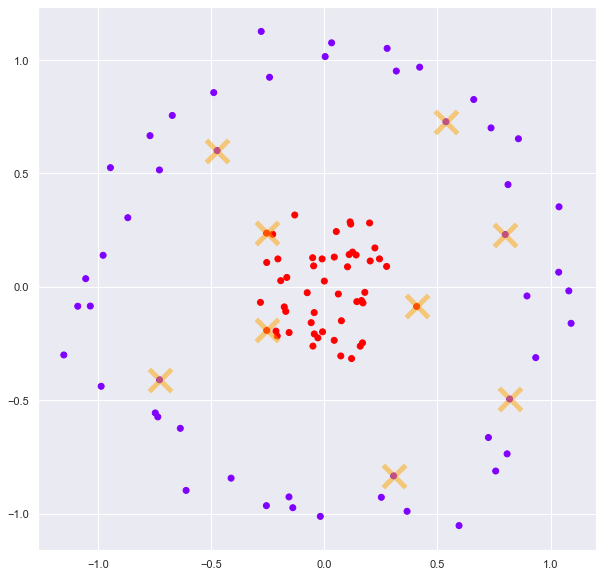

In [136]:
plt.figure(figsize= (10,10))
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)

xx, yy = np.meshgrid(xx, yy)
xy = np.vstack([xx.ravel(), yy.ravel()]).T   

plt.scatter(SVs[:,0], SVs[:,1], marker='x', s= 500, linewidth= 5, color= 'orange', alpha= 0.5)

## 

In [141]:
line = model.decision_function(xy).reshape(xx.shape)

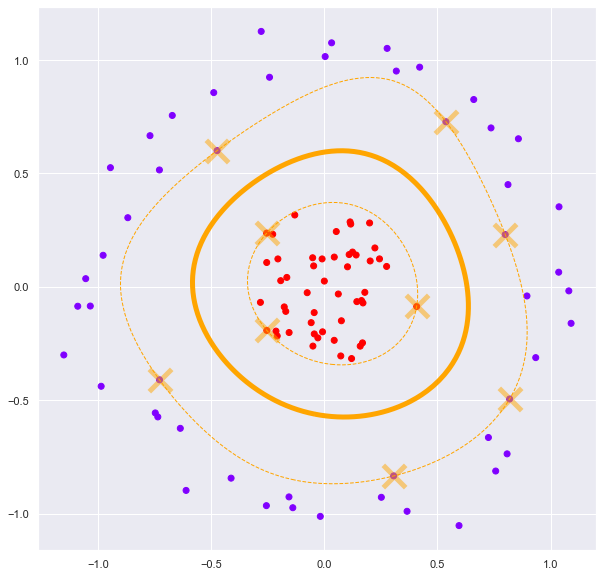

In [150]:
plt.figure(figsize= (10,10))
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'rainbow')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)

xx, yy = np.meshgrid(xx, yy)
xy = np.vstack([xx.ravel(), yy.ravel()]).T   

plt.scatter(SVs[:,0], SVs[:,1], marker='x', s= 500, linewidth= 5, color= 'orange', alpha= 0.5)
plt.contour(xx, yy, line, levels= [-1, 0, 1], colors= 'orange', linestyles= ['--', '-', '--'], linewidths= [1, 5, 1])

# Done bro! Done!

I know it is not my creation, but like manually by recalling the steps from other book, (1st book) I have tried to implement it...

So, yeah!!